In [1]:
import requests
import json
from contextlib import closing

# Make an NYTimes developer account, save key to .txt file
with open('../NYTimesAPI.txt') as f:
    api_key = f.read()

# make base URL and dictionary of get request key/values
# Example Call : https://api.nytimes.com/svc/search/v2/articlesearch.json?q=election&api-key=yourkey
url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"
payload = {'api-key': api_key, 'q':'Amazon'} # key/values for get request

# Perform the actual request
with closing(requests.get(url, params=payload)) as r:
    articles = r.json()

summary_text = [x['snippet'] for x in articles['response']['docs']]
summary_text

['A rise in illegal deforestation heightens the risk of fires in the Brazilian rainforest even more destructive than those that drew global outrage last year.',
 'The rainforest and its Indigenous groups face existential threats, while criminals act as if they have license to plunder.',
 'Mr. Paiakan became celebrated internationally for his campaigns in Brazil, even appearing once with Sting. He died of Covid-19.',
 'Brazil was responsible for more than a third of the total global loss in 2019.',
 'Sandra Benites, of the Guaraní Ñandeva people, is using art to bring new visions and voices to the museum world.',
 'Scientists have produced data that shows the range of an enigmatic short-eared canid species that has yet to be widely studied.',
 'President Jair Bolsonaro is moving aggressively to open up the Amazon rainforest to commercial development, posing an existential threat to the tribes living there.',
 'New research from Stanford University holds lessons for a world reeling from 

In [2]:
import json

with open('data/nytime.json', encoding='utf8') as f:
    articles = json.load(f)

# return the summary of the each article
summary_text = [x['snippet'] for x in articles['response']['docs']]
summary_text

['David Goldblatt’s “The Games” recalls unflattering aspects of the Olympics long before doping and gender testing.',
 'Penalizing a country for doping seems to be a much more effective way to ensure rapid and enduring change.',
 'Loroupe, who won the New York City Marathon in 1994 and 1995, is the leader of the 10 displaced athletes who make up the Refugee Olympic Team.',
 'It is time to focus on the folks going to Rio without fear or complaint — like Diana Taurasi and Sue Bird, who hope to win their fourth gold with the United States women’s basketball team.',
 'Fans may want athletes to be drug free, but they also want to be entertained by raw power, and there has long been a wink-and-nod pragmatism about weight lifting in particular.',
 'By deciding against a complete ban of Russian athletes from the Rio Games, the International Olympic Committee is sending mixed messages.',
 'How did The New York Times prepare for its Olympics coverage? Here’s a quantitative look.',
 'A real-time 

In [3]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

# This object is able to count words in a doc
count_vect = CountVectorizer()

# Learn a vocabulary: dict of all tokens in the raw documents.
# bag_words = count_vect.fit(summary_text)

# Transform documents to document-term matrix.
# bag_words = count_vect.transform(summary_text)

# outputs found words throughout all documents and outputs as 1D array
# print(count_vect.get_feature_names())

# Learn the vocabulary dictionary and return document-term matrix.
bag_words = count_vect.fit_transform(summary_text)

# shape(num of doc's, num of found words)
print(bag_words.shape)

# (Document row index, Word column index) # of occurrences in set
print(bag_words[0]) # or print(bag_words.toarray())

(10, 161)
  (0, 34)	1
  (0, 64)	1
  (0, 138)	2
  (0, 58)	1
  (0, 120)	1
  (0, 145)	1
  (0, 11)	1
  (0, 98)	1
  (0, 101)	1
  (0, 84)	1
  (0, 18)	1
  (0, 40)	1
  (0, 10)	1
  (0, 60)	1
  (0, 137)	1


In [4]:
# print out the size of vocabulary
print(len(count_vect.vocabulary_))

# print vocabulary (key) w/ corresponding value
print(count_vect.vocabulary_)

#count_vect.inverse_transform(bag_words[0])

161
{'david': 34, 'goldblatt': 64, 'the': 138, 'games': 58, 'recalls': 120, 'unflattering': 145, 'aspects': 11, 'of': 98, 'olympics': 101, 'long': 84, 'before': 18, 'doping': 40, 'and': 10, 'gender': 60, 'testing': 137, 'penalizing': 107, 'country': 32, 'for': 52, 'seems': 126, 'to': 144, 'be': 16, 'much': 95, 'more': 94, 'effective': 42, 'way': 149, 'ensure': 44, 'rapid': 117, 'enduring': 43, 'change': 24, 'loroupe': 86, 'who': 152, 'won': 158, 'new': 96, 'york': 160, 'city': 26, 'marathon': 88, 'in': 73, '1994': 1, '1995': 2, 'is': 75, 'leader': 80, '10': 0, 'displaced': 38, 'athletes': 13, 'make': 87, 'up': 147, 'refugee': 121, 'olympic': 100, 'team': 136, 'it': 76, 'time': 142, 'focus': 50, 'on': 102, 'folks': 51, 'going': 62, 'rio': 124, 'without': 156, 'fear': 49, 'or': 103, 'complaint': 29, 'like': 83, 'diana': 36, 'taurasi': 135, 'sue': 132, 'bird': 20, 'hope': 70, 'win': 153, 'their': 139, 'fourth': 54, 'gold': 63, 'with': 155, 'united': 146, 'states': 130, 'women': 157, 'bask

In [5]:
import pandas as pd

pd.options.display.max_columns = 999
df = pd.DataFrame(data = bag_words.toarray(), columns = count_vect.get_feature_names())
df

,10,1994,1995,2016,about,account,against,agence,agency,also,and,aspects,associated,athletes,ban,basketball,be,been,before,bid,bird,boston,but,by,change,citizens,city,comeback,committee,complaint,complete,countries,country,coverage,david,deciding,diana,did,displaced,dominated,doping,drug,effective,enduring,ensure,entertained,essay,european,fans,fear,focus,folks,for,fought,fourth,france,free,from,games,gatlin,gender,getty,going,gold,goldblatt,has,have,here,heroes,history,hope,how,images,in,international,is,it,its,justin,katie,leader,ledecky,lifting,like,long,look,loroupe,make,marathon,may,memories,messages,mixed,modern,more,much,new,nod,of,olympians,olympic,olympics,on,or,particular,past,peerless,penalizing,photo,photographers,power,pragmatism,prepare,press,presse,pressphoto,quantitative,rapid,raw,real,recalls,refugee,reject,reuters,rio,russian,seems,sending,snapshot,sprinter,states,stream,sue,summer,swimmer,taurasi,team,testing,the,their,there,they,time,times,to,unflattering,united,up,want,way,weight,which,who,win,wink,with,without,women,won,writers,york
0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,2,1,0,0,1,0,3,0,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0
4,0,0,0,0,1,0,0,0,0,1,2,0,0,1,0,0,2,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,2,0,0,0,2,0,1,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,1,

In [6]:
# print out 10 most common words in our data
df.sum().sort_values()[-10:]

for          3
who          3
by           3
olympics     4
is           4
their        4
of           8
to           8
and          9
the         18
dtype: int64

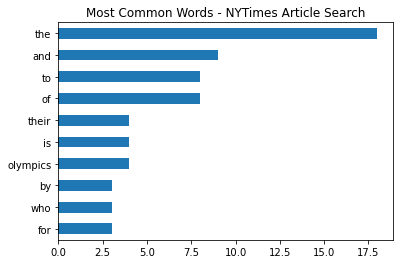

In [7]:
# plot the data frame
%matplotlib inline

# 10 most common words found
df.sum().sort_values()[-10:].plot(kind='barh', title = "Most Common Words - NYTimes Article Search")

# 1 least common words found
# df.sum().sort_values()[:10].plot(kind='barh', title = "Least Common Words - NYTimes Article Search")
